In [4]:
import json
import pandas as pd

# Step 1: Open the JSON file
with open('16056.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Step 2: Flatten it into a table
df = pd.json_normalize(data, sep='_')

# Step 3: Filter only 'Shot' events
df = df[df['type_name'] == 'Shot']

# Step 4: View the top 5 shot events
df.head()


,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,bad_behaviour_card_id,bad_behaviour_card_name,foul_committed_penalty,foul_won_penalty,block_offensive,shot_open_goal
45,80f4df2b-a30e-4d0c-8b4c-09d639a07138,46,1,00:00:43.985,0,43,2,0.754068,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,a50357f9-0e37-48cf-b9d5-68f787d5073c,117,1,00:01:51.083,1,51,4,1.009374,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,5a9b31a4-0427-4126-a492-3bfd81b51d6b,125,1,00:02:21.661,2,21,6,0.168117,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,126eb201-4423-404e-a365-4c9253f7f9e8,177,1,00:04:24.501,4,24,11,0.536431,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,1eaa79e1-d252-42f4-95c4-df999cbdd7de,210,1,00:05:05.435,5,5,12,0.714286,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import numpy as np

df['x'] = df['location'].apply(lambda x: x[0])
df['y'] = df['location'].apply(lambda x: x[1])
df['distance'] = np.sqrt((120 - df['x'])**2 + (40 - df['y'])**2)


In [6]:
df['is_goal'] = df['shot_outcome_name'].apply(lambda x: 1 if x == 'Goal' else 0)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['distance']]
y = df['is_goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

print("Model Accuracy:", model.score(X_test, y_test))


Model Accuracy: 0.5714285714285714


In [8]:
df['xG'] = model.predict_proba(X)[:, 1]
df[['player_name', 'xG', 'is_goal']].head()


,player_name,xG,is_goal
45,Lionel Andrés Messi Cuccittini,0.351876,0
116,Sergio Busquets i Burgos,0.032963,0
124,Luis Alberto Suárez Díaz,0.062179,0
176,Lorenzo Jesús Morón García,0.361706,0
209,Malcom Filipe Silva de Oliveira,0.016209,0


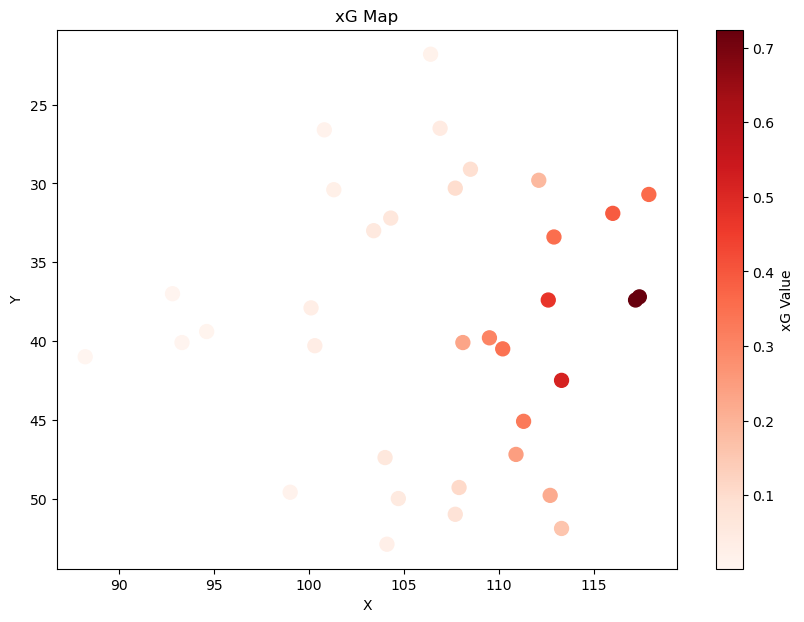

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(df['x'], df['y'], c=df['xG'], cmap='Reds', s=100)
plt.colorbar(label="xG Value")
plt.title("xG Map")
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().invert_yaxis()
plt.show()
